In [1]:
import torch

# Backpropagation algorithm
Say we have 2 functions
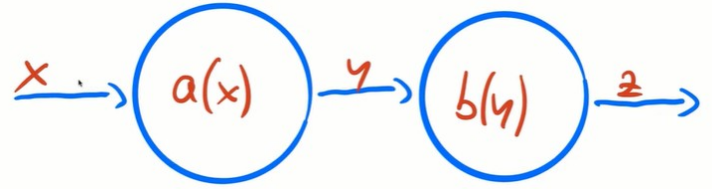
We want to minimize the final output: `z = b(a(x))`

In [4]:
x = torch.ones(2, dtype=torch.float32, requires_grad=True)
x

tensor([1., 1.], requires_grad=True)

In [10]:
# a(x) = x^2
a = x ** 2
a

tensor([1., 1.], grad_fn=<PowBackward0>)

In [11]:
# b(a) = sum(a) / 4
b = (a/4).sum()
b

tensor(0.5000, grad_fn=<SumBackward0>)

To minimize our output we need to know the derivative $\frac{dz}{dx}$. For this reason we can apply **chain rule**:
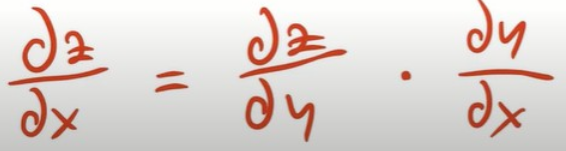

In our case: $\frac{dz}{dx}=\frac{db}{da} * \frac{da}{dx} = \frac{1}{4} * 2 * x = \vec{gradient} = [ 0.5 * x_1, 0.5 * x_2]$

In [12]:
b.backward()
x.grad

tensor([0.5000, 0.5000])

For each operation PyTorch create a graph, where every node means operation or function. Each node has input and output. This graph let us to calculate *the local gradients* in each node and then use it in the chain rule to get a general gradient. These graphs are called **computational graphs**
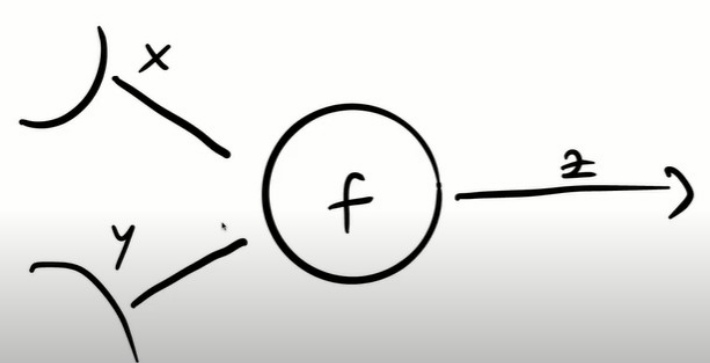

**BackProp algorithm**:
- *forward pass*: compute output of loss function
- *backward pass*: compute local gradients and use them for compute `d(loss)/dw`, where `w` means model's weights/parameters
- *updating weights*

In [13]:
x = torch.tensor([1, 2])
y = torch.tensor(7)
w = torch.tensor([3.0, 3.0], requires_grad = True)

# forward pass
y_hat = torch.sum(w * x)
loss = (y_hat-y)**2
print(f'y_hat = {y_hat}, loss = {loss}')

# local gradients - in black box
# backward pass
loss.backward()
print('gradient d(loss)/dw is ', w.grad)

# UPDATE WEIGTHS
w = w - w.grad * 0.01
print('new weights are ', w)

y_hat = 9.0, loss = 4.0
gradient d(loss)/dw is  tensor([4., 8.])
new weights are  tensor([2.9600, 2.9200], grad_fn=<SubBackward0>)


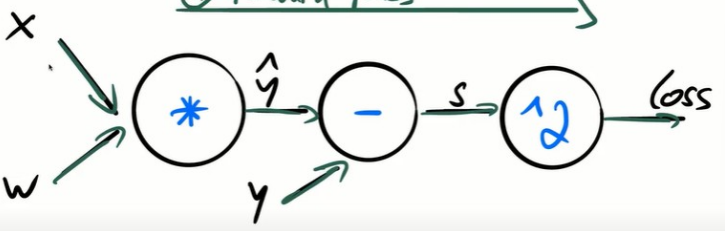